# Cu-B

TODO:

 - Clean up time-resolved R(q) plots
 - Refit 60 Hz data and time-resolved data using constraint fit as starting point
 - FIX imaginary SLD of platted layer to zero?
 - Look at time resolved 201297 and 201305 to see if we need to fit them

In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [27]:
project_dir = os.path.expanduser('~/git/nh3-analysis/jan2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6')

#dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
dyn_model_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')

#results_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting', 'results'))


# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-29196/shared/autoreduce/'

# Directory with fit results
fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')

dynamic_run = 201289 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201289-dyn/results-15s'


## Summary of 60 Hz data

Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201282/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201282/__model.py
Z offset = -110.003;    Z_max = 768.9
Too many points: pruning down
MC file read: 0.0011670589447021484 sec
Done 4.861077547073364 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201290/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201290/__model.py
Z offset = -215.58;    Z_max = 1175.7
Too many points: pruning down
MC file read: 0.003913164138793945 sec
Done 1.0417520999908447 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201298/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201298/__model.py
Z offset = -224.598;    Z_max = 1200.5
Too many points: pruning down
MC file read: 0.006070613861083984 sec
Done 1.302196979522705 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201306/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201306/__model.py
Z offset = -258.991

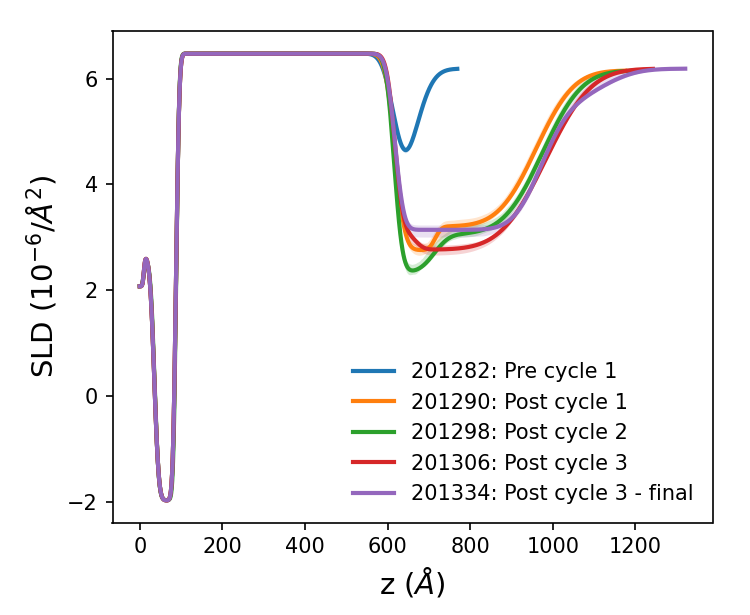

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(201282, "201282: Pre cycle 1", fit_dir=fit_dir)
summary_plots.plot_sld(201290, "201290: Post cycle 1", fit_dir=fit_dir)
summary_plots.plot_sld(201298, "201298: Post cycle 2", fit_dir=fit_dir)
summary_plots.plot_sld(201306, "201306: Post cycle 3", fit_dir=fit_dir)
summary_plots.plot_sld(201334, "201334: Post cycle 3 - final", fit_dir=fit_dir)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


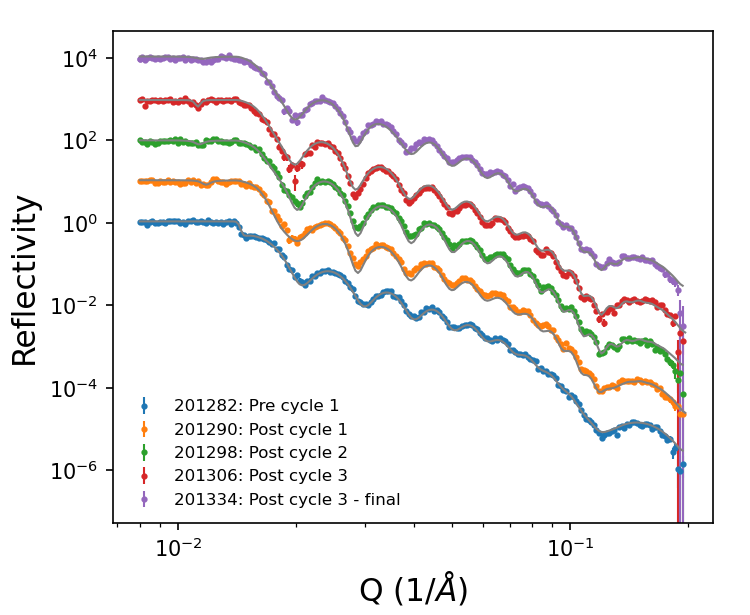

In [4]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(201282, '201282: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201290, '201290: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201298, '201298: Post cycle 2', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201306, '201306: Post cycle 3', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201334, '201334: Post cycle 3 - final', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


582


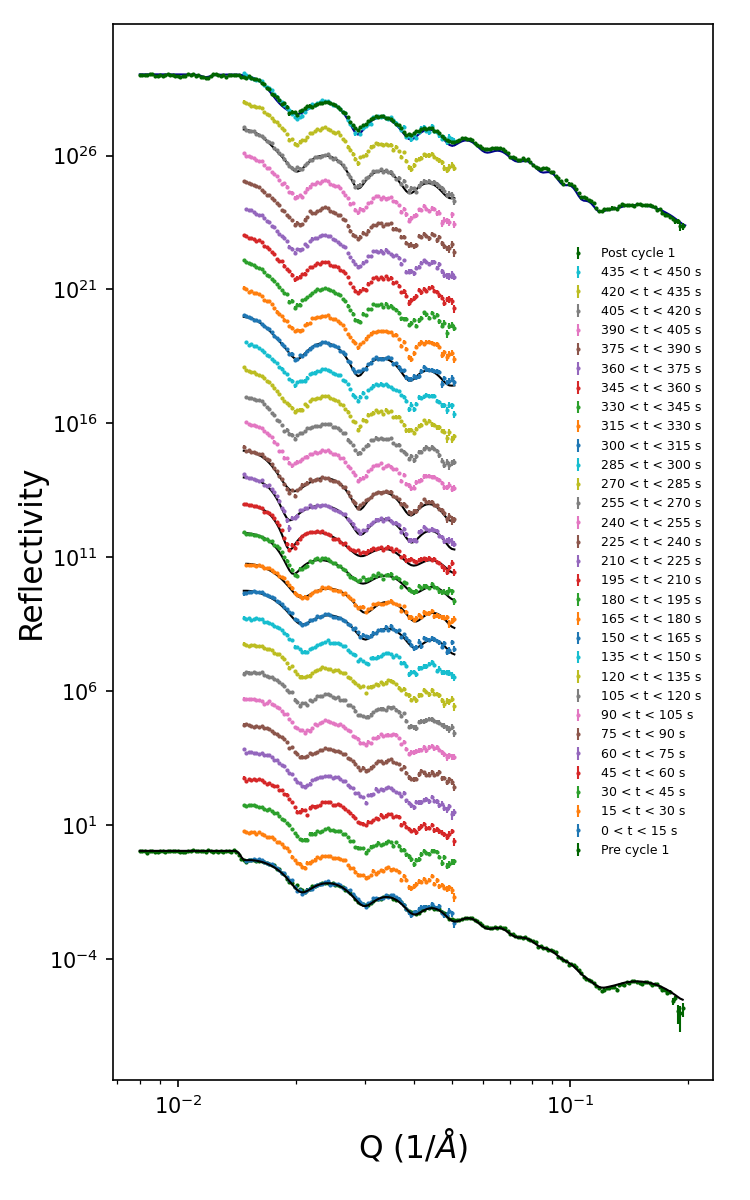

In [20]:
importlib.reload(summary_plots)


summary_plots.plot_dyn_data(dynamic_run, 201282, 201290, first_index=0, last_index=30, delta_t=15, model_name='model-loop-v2',
                            fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

582
Ref r201289_t000015.txt
Skipped: 26


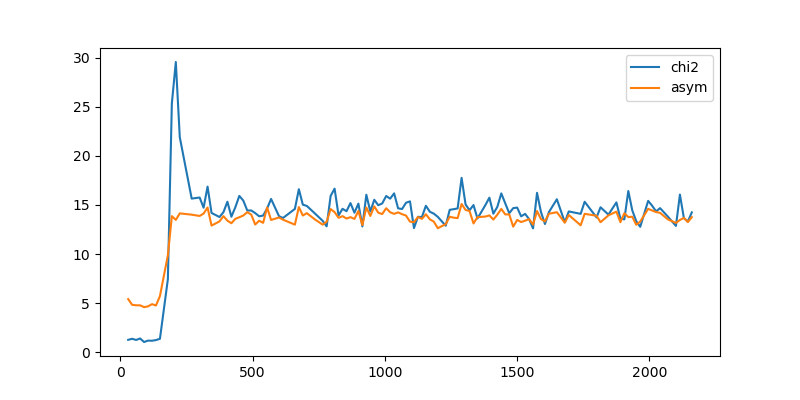

In [6]:
importlib.reload(summary_plots)

chi2 = summary_plots.detect_changes(201289, dyn_data_dir, first=1, last=150)

In [7]:
# Plot manual fits
importlib.reload(summary_plots)

dynamic_run = 201289 # Cycle 1

# List of time-resolved data to plot
file_list = [[150, 'r201289_t000150', '2214805'],
             #[165, 'r201289_t000165', '2214802'],
             #[180, 'r201289_t000180', '2214801'],
             #[195, 'r201289_t000195', '2214800'],
             #[210, 'r201289_t000210', '2214803'],
             #[225, 'r201289_t000225', '2214804'],
             [300, 'r201289_t000300', '2215756'],
             [600, 'r201289_t000600', '2215758'],
             [900, 'r201289_t000900', '2215775'],
             [1200, 'r201289_t001200', '2215778'],
             [8010, 'r201289_t008010', '2215784'],
             
            ]

#summary_plots.plot_dyn_sld(file_list, None, 201290, 
#                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

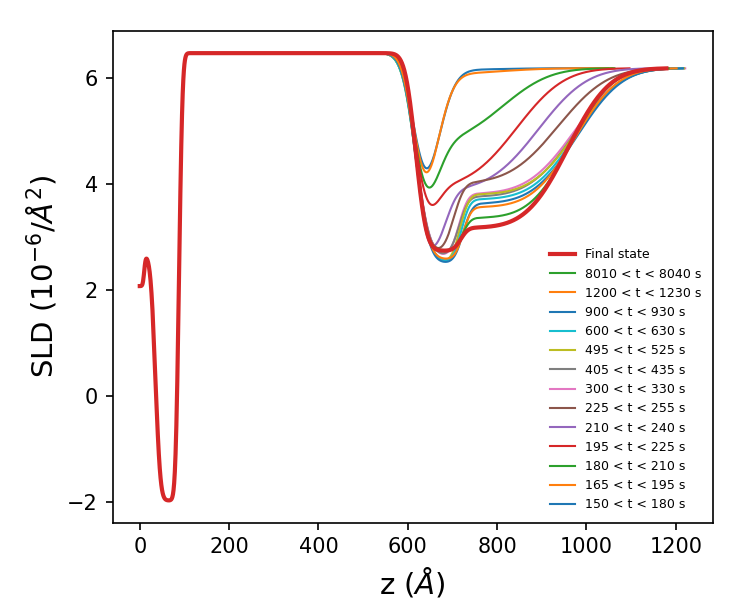

In [21]:
importlib.reload(summary_plots)

dynamic_run = 201289 # Cycle 1

#dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
#dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results'
fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'
model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

# List of time-resolved data to plot
file_list = [[150, 'r201289_t000150', 'r201289_t000150'],
             [165, 'r201289_t000165', 'r201289_t000165'],
             [180, 'r201289_t000180', 'r201289_t000180'],
             [195, 'r201289_t000195', 'r201289_t000195'],
             [210, 'r201289_t000210', 'r201289_t000210'],
             [225, 'r201289_t000225', 'r201289_t000225'],
             [300, 'r201289_t000300', 'r201289_t000300'],
             [405, 'r201289_t000405', 'r201289_t000405'],
             [495, 'r201289_t000495', 'r201289_t000495'],
             [600, 'r201289_t000600', 'r201289_t000600'],
             [900, 'r201289_t000900', 'r201289_t000900'],
             [1200, 'r201289_t001200', 'r201289_t001200'],
             [8010, 'r201289_t008010', 'r201289_t008010'],
            ]

# os.path.join(project_dir, 'model-loop-v2.py')
summary_plots.plot_dyn_sld(file_list, None, 201290, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                           model_name='model-loop-v2', model_file=model_file, show_cl=False)

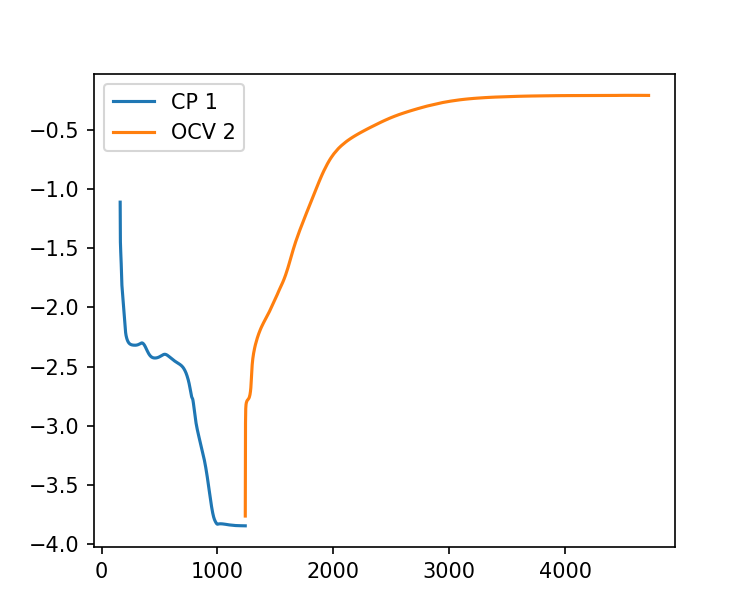

In [6]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))

ec_cp1 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_CP1.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_cp1[0], ec_cp1[1], label='CP 1')

#ec_cp2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_CP2.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_cp2[0], ec_cp2[1], label='CP 2')
         
ec_ocv2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_OCV2.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_ocv2[0], ec_ocv2[1], label='OCV 2')
         
#ec_ocv3 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_OCV3.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_ocv3[0], ec_ocv3[1], label='OCV 3')
plt.legend()

Text(0, 0.5, 'Potential')

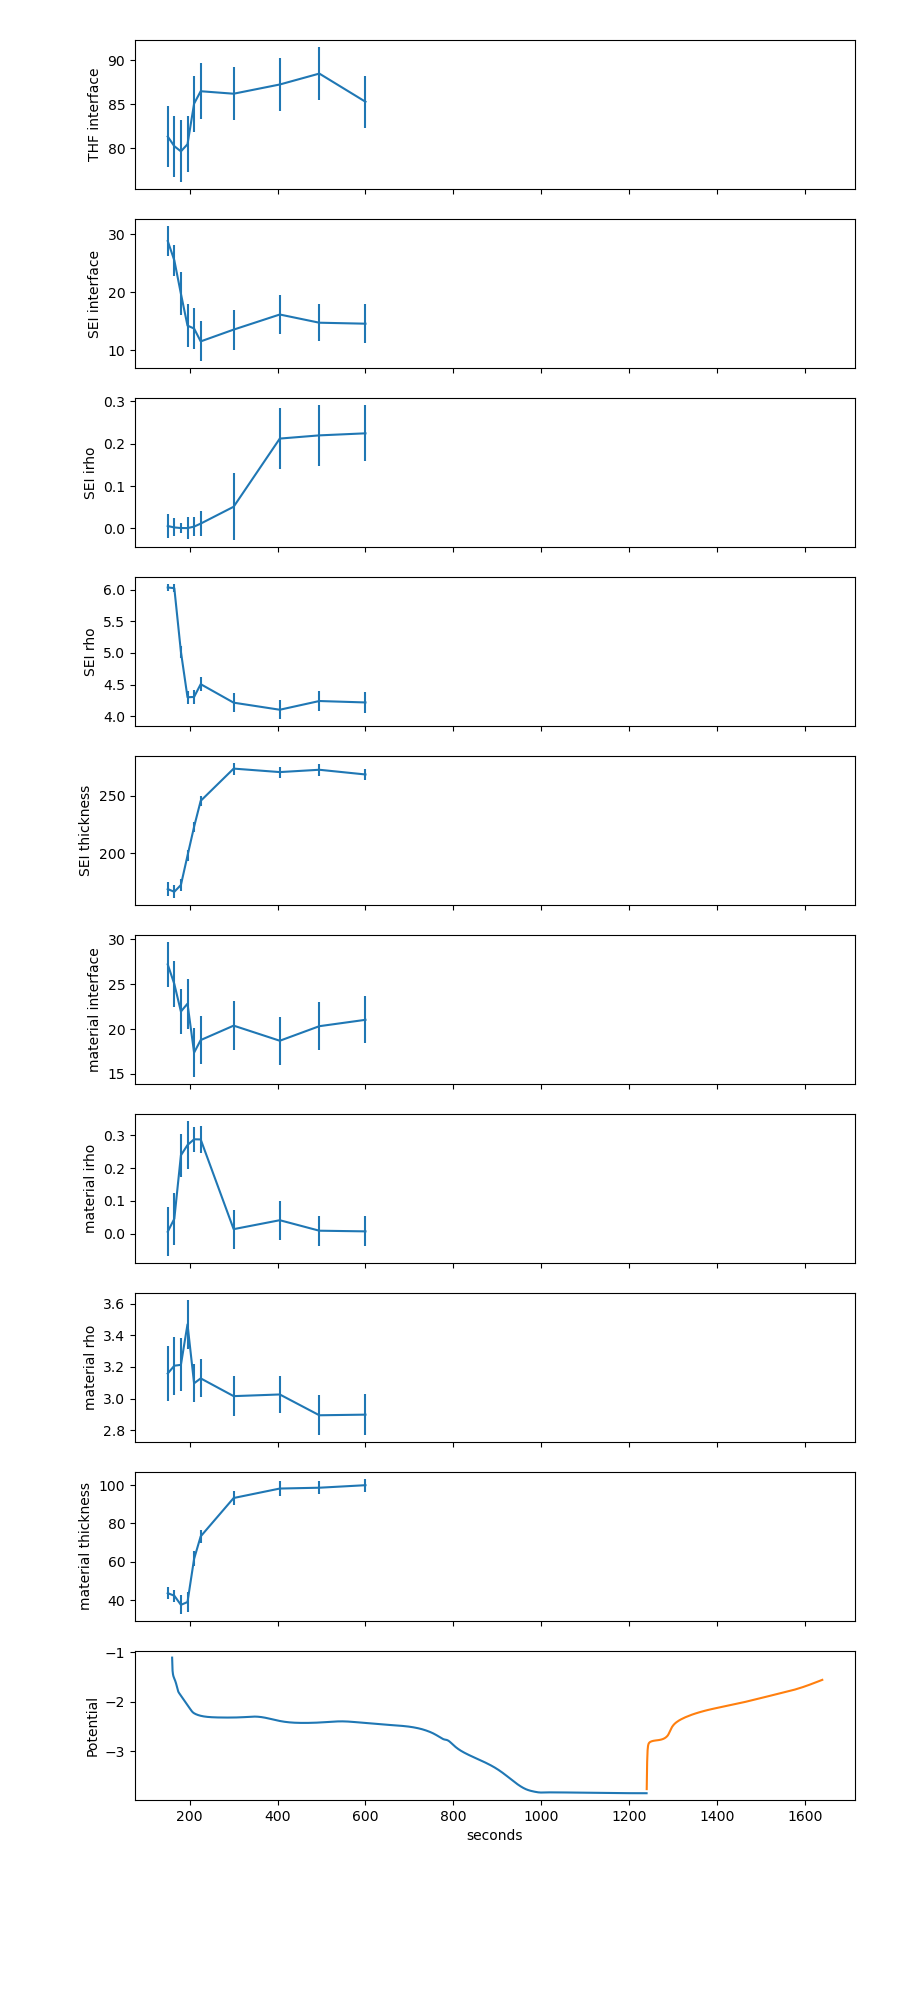

In [26]:
importlib.reload(summary_plots)

summary_plots.trend_data(file_list[:-1], None, 201290, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-v2', model_file=model_file, add_plot=1)

offset = 0
ax = plt.subplot(10, 1, 10)
plt.plot(ec_cp1[0]+offset, ec_cp1[1], label='CP 1')

imax = 800

plt.plot(ec_ocv2[0][:imax]+offset, ec_ocv2[1][:imax], label='OCV 2')
plt.xlabel('seconds')
plt.ylabel('Potential')

# 5-second data

## Trend data

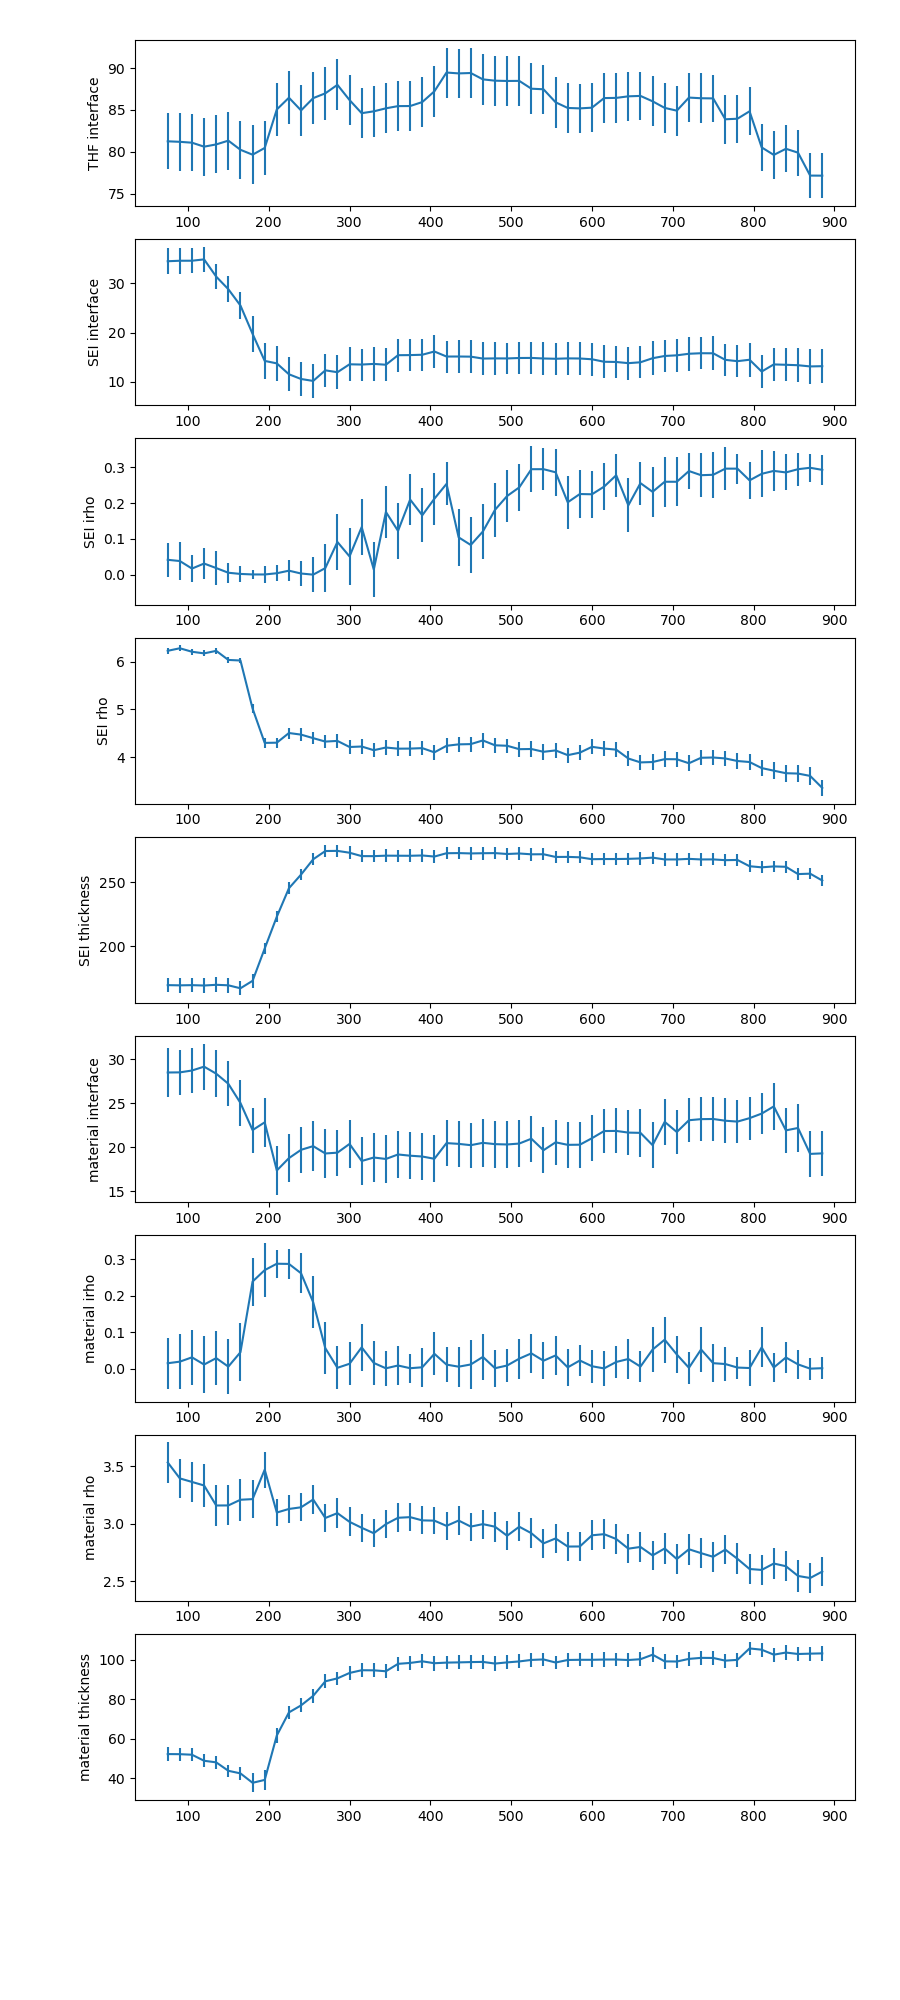

In [28]:
importlib.reload(summary_plots)

summary_plots.trend_data(file_list[:-2], None, 201290, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-v2', model_file=model_file)


if False:
    dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/5s'
    dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-5s'

    #dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
    #dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-15s'

    first = 15
    last = 60

    _file_list = sorted(os.listdir(dyn_data_dir))

    # Get only the files for the run we're interested in
    _good_files = []
    for _f in _file_list:
        if _f.startswith('r%d_t' % dynamic_run):
            a, _ = os.path.splitext(_f)
            t = int(a[-6:])
            _good_files.append([t, a, a])

    _good_files = _good_files[first:last]
    _good_files.reverse()

    model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

    summary_plots.trend_data(_good_files, None, 201290, 
                             fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                             model_name='model-loop-v2', model_file=model_file, newplot=False)

#dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/5s'
#dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-5s-prior_1_0'
#summary_plots.trend_data(_good_files, None, 201290, 
#                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
#                         model_name='model-loop-v2', model_file=model_file, newplot=False)



dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-15s'
#fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'
#model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

first = 5
last = 60

_file_list = sorted(os.listdir(dyn_data_dir))

# Get only the files for the run we're interested in
_good_files = []
for _f in _file_list:
    if _f.startswith('r%d_t' % dynamic_run):
        a, _ = os.path.splitext(_f)
        t = int(a[-6:])
        _good_files.append([t, a, a])

_good_files = _good_files[first:last]
_good_files.reverse()


summary_plots.trend_data(_good_files, None, 201290, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-v2', model_file=model_file, newplot=False)


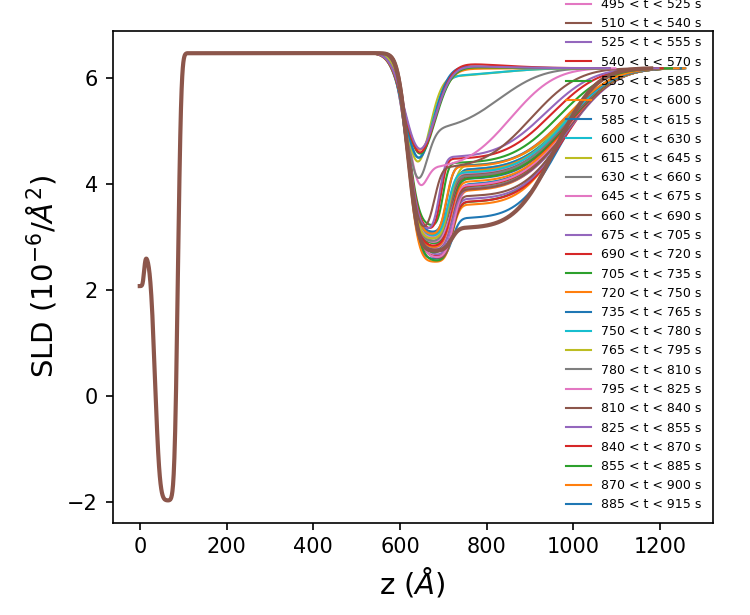

In [14]:
importlib.reload(summary_plots)

summary_plots.plot_dyn_sld(_good_files, None, 201290, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                           model_name='model-loop-v2', model_file=model_file, show_cl=False)